In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/content/SuperStoreOrders.csv')

In [6]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2.0,0.0,106.140,35.46,Medium,2011.0
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3.0,0.1,36.036,9.72,Medium,2011.0
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4.0,0.0,29.640,8.17,High,2011.0
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3.0,0.5,-26.055,4.82,High,2011.0
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5.0,0.1,37.770,4.70,Medium,2011.0


In [24]:
print(df["shipping_days"])

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
29872    5.0
29873    4.0
29874    4.0
29875    4.0
29876    NaN
Name: shipping_days, Length: 29877, dtype: float64


In [8]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y', errors='coerce')
df['ship_date'] = pd.to_datetime(df['ship_date'], format='%d-%m-%Y', errors='coerce')

# Add errors='coerce' to turn unparseable dates into NaT (Not a Time) instead of raising an error
# This can be useful for identifying problematic rows if any dates don't conform to the specified format.

In [21]:
df.isnull().sum()
df.duplicated().sum()


np.int64(0)

In [23]:
mean_profit=np.mean(df['profit'])
print("Average Profit: ",mean_profit)

corr = df[['sales', 'profit', 'discount', 'quantity']].corr()
print("Correlation between sales, profit, discount, quantity:\n ",corr)


Average Profit:  28.285675631945374
Correlation between sales, profit, discount, quantity:
               sales    profit  discount  quantity
sales     1.000000  0.234855 -0.104202  0.282937
profit    0.234855  1.000000 -0.324446  0.097073
discount -0.104202 -0.324446  1.000000 -0.023574
quantity  0.282937  0.097073 -0.023574  1.000000


<ipython-input-16-873664144>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby('sub_category')['profit'].sum().reset_index().sort_values(by='profit', ascending=False),


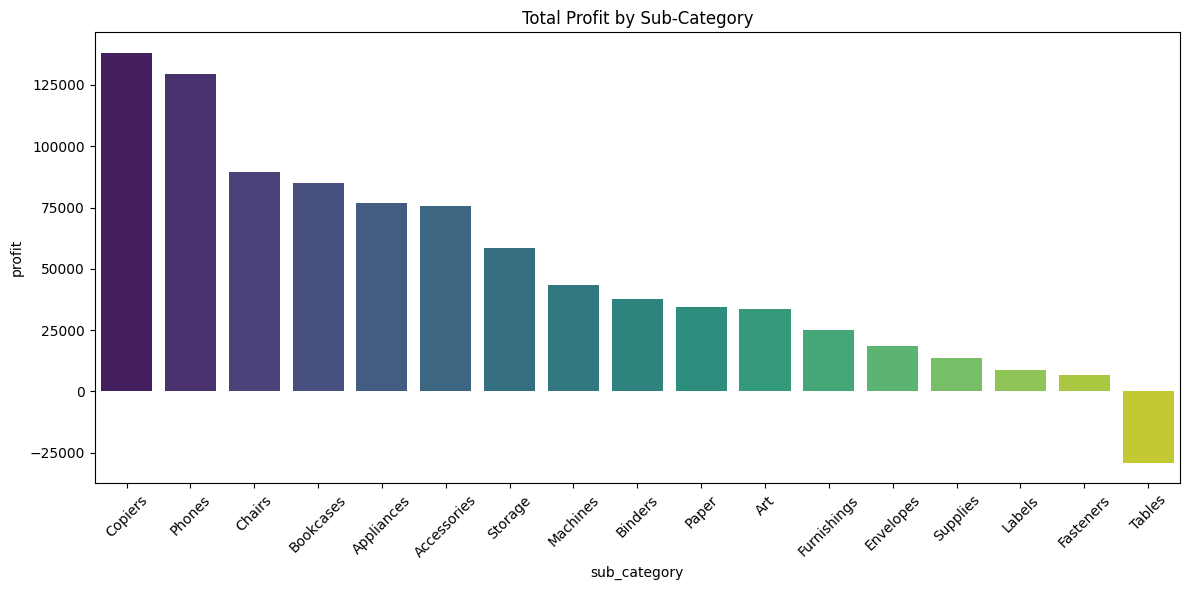

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df.groupby('sub_category')['profit'].sum().reset_index().sort_values(by='profit', ascending=False),
            x='sub_category', y='profit', palette='viridis')
plt.xticks(rotation=45)
plt.title('Total Profit by Sub-Category')
plt.tight_layout()
plt.show()

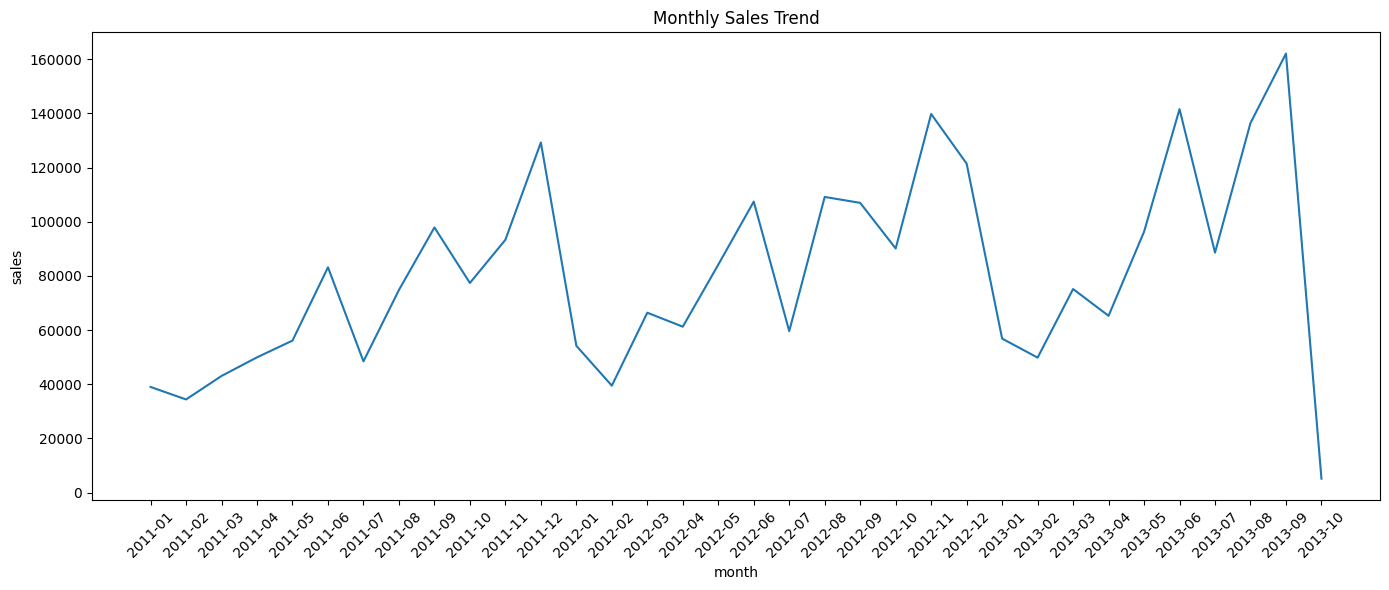

In [17]:
monthly_sales = df.groupby('month')['sales'].sum().reset_index()
monthly_sales['month'] = monthly_sales['month'].astype(str)

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='month', y='sales')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.tight_layout()
plt.show()

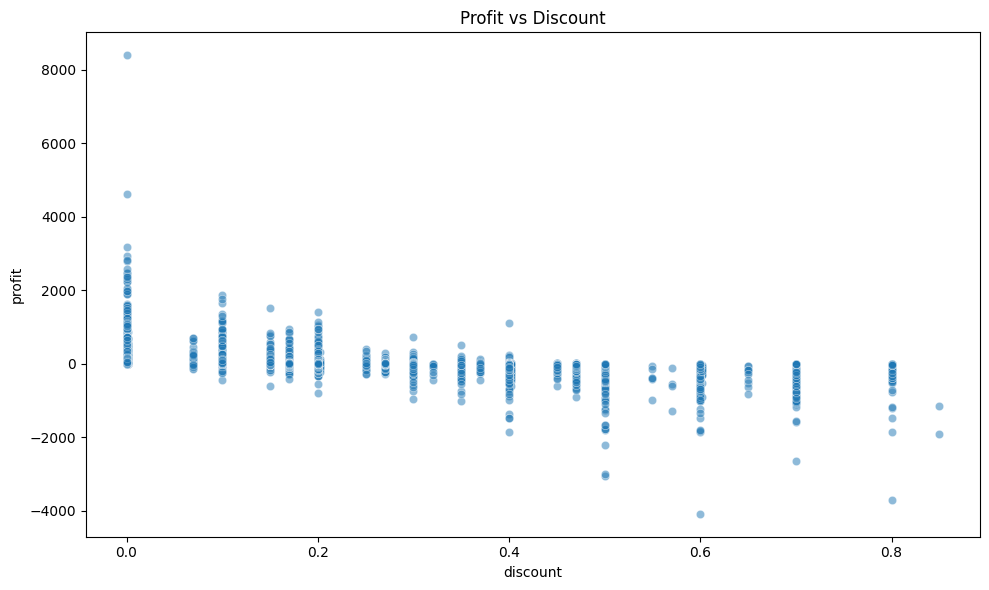

In [18]:


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='discount', y='profit', alpha=0.5)
plt.title('Profit vs Discount')
plt.tight_layout()
plt.show()


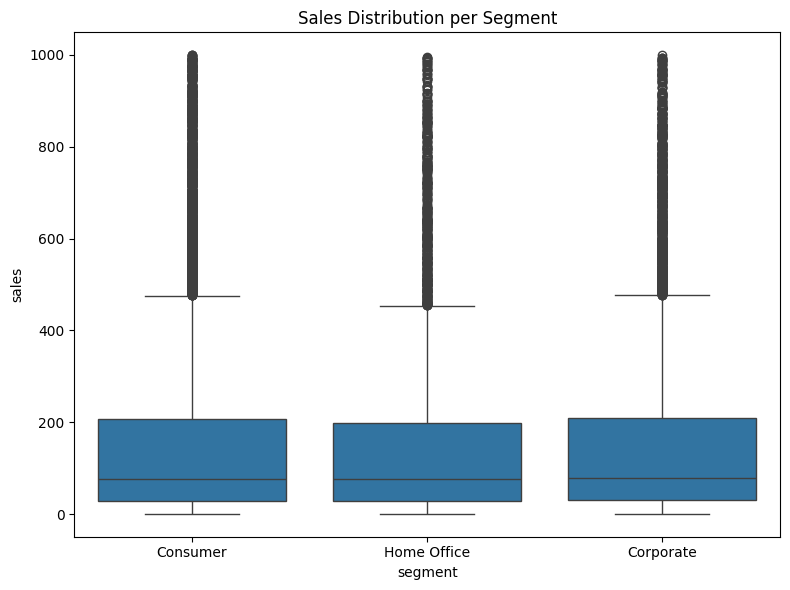

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='segment', y='sales')
plt.title('Sales Distribution per Segment')
plt.tight_layout()
plt.show()


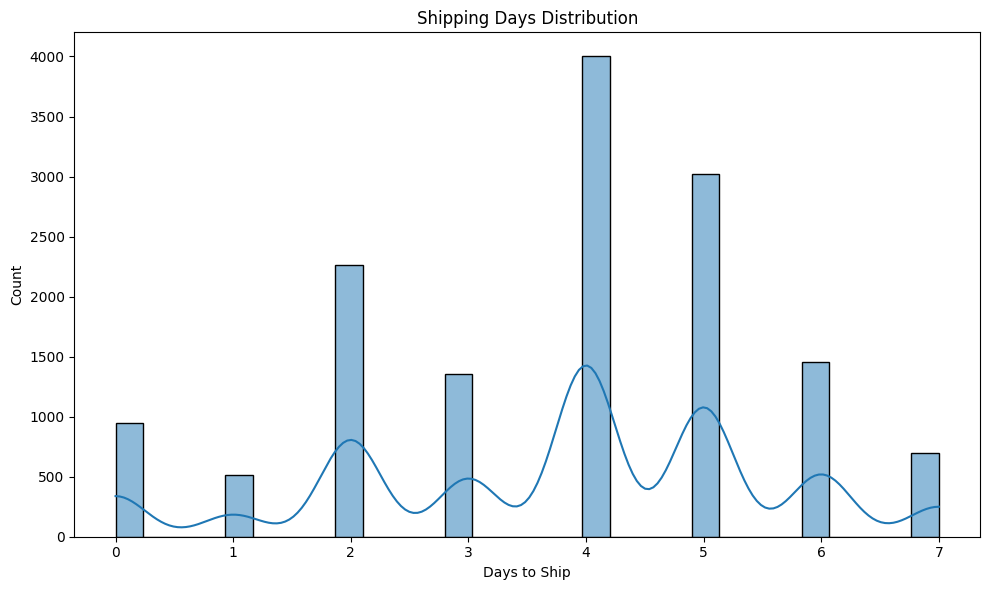

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['shipping_days'], bins=30, kde=True)
plt.title('Shipping Days Distribution')
plt.xlabel('Days to Ship')
plt.tight_layout()
plt.show()
